# IndabaX DRC 2023

## Tutoriel : Exploration et Analyse des données

### Part 2

## 1. Operation sur les données

Habituellement, dans certaines tâches d'analyse de données, les informations peuvent être dévoilées lorsque les données sont agrégées ou regroupées.

La plupart du temps, cela aide le lecteur à se faire une idée de l'ensemble de données avec lequel il traite et cela révèle également quelques points clés qui peuvent être utilisés lors du processus de prise de décision.

Ici, nous en présenterons certains, notamment le regroupement, la synthèse et l'agrégation en utilisant la fonction **groupby**

### a. Groupby 

La fonction **Pandas dataframe.groupby()** est utilisée pour repartir les données en groupe suivant certains critères.


In [1]:
##Commencos par importer le module Pandas
import pandas as pd

In [2]:
##importer les données

df = pd.read_csv('data/gapminder.tsv' , "\t")
df.head(5)

,country,continent,year,lifeExp,pop,gdpPercap
0,Algeria,Africa,1952,43.077,9279525,2449.008185
1,Algeria,Africa,1957,45.685,10270856,3013.976023
2,Algeria,Africa,1962,48.303,11000948,2550.816880
3,Algeria,Africa,1967,51.407,12760499,3246.991771
4,Algeria,Africa,1972,54.518,14760787,4182.663766


In [23]:
df['continent'].unique()

array(['Africa', 'Americas', 'Oceania', 'Europe', 'Asia'], dtype=object)

In [25]:
df['country'].unique()

array(['Algeria', 'Angola', 'Argentina', 'Australia', 'Austria',
       'Bahrain', 'Bangladesh', 'Belgium', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Lebanon', 'Lesotho', 'Liberia'

In [3]:
#Groupons les donnée par année (year)
g1 = df.groupby('year')
g1

Bien que les données soient groupées, elles ne donnent aucune information pertinente puisque l'utilisateur n'a pas demandé autre chose que les données à regrouper par année.

**Et si nous voulons obtenir la moyenne de l'espérance de vie (life expectancy) pour les données groupées annuelles ?**

In [4]:
g1.lifeExp.mean()

year
1952    49.158221
1957    51.603135
1962    53.683545
1967    55.757694
1972    57.729649
1977    59.654245
1982    61.624571
1987    63.309779
1992    64.267950
1997    65.124079
2002    65.792136
2007    67.105736
Name: lifeExp, dtype: float64


**On peut aussi afficher la variance de la colonne de population pour les données groupées par continent**

In [5]:
g2  = df.groupby('continent')
g2.pop.var()

continent
Africa      2.399687e+14
Americas    2.598902e+15
Asia        4.402000e+16
Europe      4.279715e+14
Oceania     4.233249e+13
Name: pop, dtype: float64


**Aussi les statistiques descriptives de l'espérance de vie (lifeExp) pour les données groupées annuelles**

In [6]:
g3 = df.groupby('year')
g3.lifeExp.describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1952,140.0,49.158221,12.181478,30.000,39.11500,45.1355,59.96400,72.670
1957,140.0,51.603135,12.169108,31.570,41.32650,48.3605,63.18325,73.470
1962,140.0,53.683545,12.007452,32.767,43.54950,50.8810,65.33700,73.680
1967,140.0,55.757694,11.624418,34.113,46.17325,53.8250,67.50250,74.160
1972,140.0,57.729649,11.284350,35.400,48.62675,56.5300,69.29250,74.720
1977,140.0,59.654245,11.136169,31.220,50.72650,59.6720,70.42000,76.110
1982,140.0,61.624571,10.663845,38.445,52.95400,62.4415,70.98575,77.110
1987,140.0,63.309779,10.433923,39.906,54.97025,65.8340,71.80575,78.670
1992,140.0,64.267950,11.127546,23.599,56.32925,67.7030,72.63875,79.360


**Cela peut même être avancé d'un niveau, car nous pourrions également obtenir la moyenne
du pibPerCap (gdpPercap) pour les données groupées annuelles et "par continent"**

In [7]:
g4 = df.groupby(['year' , 'continent'])

g4.gdpPercap.mean()

year  continent
1952  Africa        1252.572466
      Americas      4079.062552
      Asia          5333.485213
      Europe        5801.057480
      Oceania      10298.085650
1957  Africa        1385.236062
      Americas      4616.043733
      Asia          5942.947937
      Europe        7136.141387
      Oceania      11598.522455
1962  Africa        1598.078825
      Americas      4901.541870
      Asia          5881.753028
      Europe        8574.197085
      Oceania      12696.452430
1967  Africa        2050.363801
      Americas      5668.253496
      Asia          6131.641381
      Europe       10398.431578
      Oceania      14495.021790
1972  Africa        2339.615674
      Americas      6491.334139
      Asia          8420.202687
      Europe       12795.649490
      Oceania      16417.333380
1977  Africa        2585.938508
      Americas      7352.007126
      Asia          8010.226541
      Europe       14654.702392
      Oceania      17283.957605
1982  Africa        2481

Vous avez peut-être remarqué que ces calculs ne fonctionnent que pour les fonctions intégrées pandas,
comme moyenne, mean(), max(), min(), std() , var().

Pour ceux qui veulent gérer leur propre fonction. Comment procéder?

### b. Aggregation 


**La première approche consiste à utiliser les fonctions intégrées de la bibliothèque numpy**

La commande ci-dessous renvoie la médiane de la colonne 'gdpPercap'  des données groupées par année 

In [9]:
##commencons par importer le module numpy
import numpy as np 

In [10]:
g5 = df.groupby('year')['gdpPercap'].agg(np.median)
g5

year
1952    2039.022668
1957    2219.620969
1962    2406.396157
1967    2678.334741
1972    3407.766502
1977    3821.864721
1982    4249.929974
1987    4381.397334
1992    4441.841270
1997    4837.046833
2002    5537.232160
2007    6548.314896
Name: gdpPercap, dtype: float64

Vous pouvez également définir votre propre fonction.

La fonction ci-dessous renvoie l'équivalent en siècle de la moyenne des données groupées par annuée.

In [11]:
#Une fonction
import numpy as np
def century(values):
    """Cette fonction renvoie l'équivalent
    en siècles de la moyenne d'un groupe"""
    n = len(values)
    s = np.sum(values)
    m = s /(n*100)
    return m 
    

In [27]:
##Calcule l'équivalent en siècles de espérance de vie moyenne d'un groupe
g6 = df.groupby('year')
g6.lifeExp.agg(century)

year
1952    0.491582
1957    0.516031
1962    0.536835
1967    0.557577
1972    0.577296
1977    0.596542
1982    0.616246
1987    0.633098
1992    0.642680
1997    0.651241
2002    0.657921
2007    0.671057
Name: lifeExp, dtype: float64

A vous de jouer! Experimentez avec des fonctions de votre choix.



## 2.  Visualisation avec Matplotlib

Pour cet exercise, nous allons utilisé le meme tableau des données **df** avec le module **Matplotlib**

In [18]:
## commencons par importer

import matplotlib.pyplot as plt
%matplotlib inline

### Exploration avec les données de a RDC.

1. Afficher espérance de vie (lifeExp), la population ainsi que le pib des congolais par année

In [26]:
df1 = df[(df['continent']=='Africa') & (df['country']=='Congo, Dem. Rep.')] 
df1

,country,continent,year,lifeExp,pop,gdpPercap
300,"Congo, Dem. Rep.",Africa,1952,39.143,14100005,780.542326
301,"Congo, Dem. Rep.",Africa,1957,40.652,15577932,905.860230
302,"Congo, Dem. Rep.",Africa,1962,42.122,17486434,896.314634
303,"Congo, Dem. Rep.",Africa,1967,44.056,19941073,861.593242
304,"Congo, Dem. Rep.",Africa,1972,45.989,23007669,904.896069
305,"Congo, Dem. Rep.",Africa,1977,47.804,26480870,795.757282
306,"Congo, Dem. Rep.",Africa,1982,47.784,30646495,673.747818
307,"Congo, Dem. Rep.",Africa,1987,47.412,35481645,672.774812
308,"Congo, Dem. Rep.",Africa,1992,45.548,41672143,457.719181
309,"Congo, Dem. Rep.",Africa,1997,42.587,47798986,312.188423


No handles with labels found to put in legend.


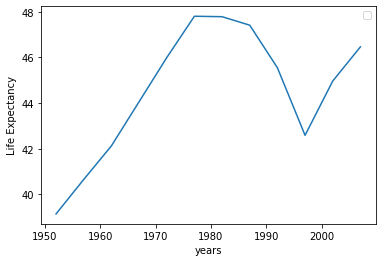

In [31]:
##Visualiser espérance de vie des congolais
plt.plot(df1['year'], df1["lifeExp"])
plt.xlabel('years')
plt.ylabel('Life Expectancy')
plt.legend()

No handles with labels found to put in legend.


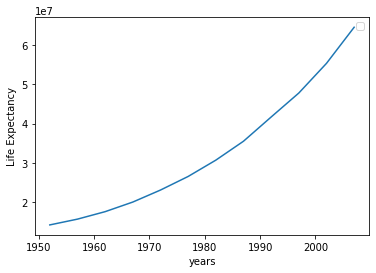

In [28]:
##Visualiser la population de la RDC
plt.plot(df1['year'], df1["pop"])
plt.xlabel('years')
plt.ylabel('Life Expectancy')
plt.legend(loc = 'best')

In [29]:
df1[df1['year']>1995]  ##Extration pour les années après 1995

,country,continent,year,lifeExp,pop,gdpPercap
309,"Congo, Dem. Rep.",Africa,1997,42.587,47798986,312.188423
310,"Congo, Dem. Rep.",Africa,2002,44.966,55379852,241.165877
311,"Congo, Dem. Rep.",Africa,2007,46.462,64606759,277.551859


No handles with labels found to put in legend.


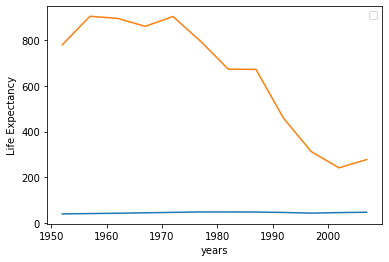

In [30]:
## ##Visualiser espérance de vie ainsi que le pib des congolais
plt.plot(df1['year'], df1["lifeExp"])
plt.plot(df1['year'], df1["gdpPercap"])
plt.xlabel('years')
plt.ylabel('Life Expectancy')
plt.legend(loc = 'best')

## Visualisation avec histogramme

([<matplotlib.axis.XTick at 0x7f44c535ea90>,
 [Text(0, 0, '1952'),
  Text(1, 0, '1957'),
  Text(2, 0, '1962'),
  Text(3, 0, '1967'),
  Text(4, 0, '1972'),
  Text(5, 0, '1977'),
  Text(6, 0, '1982'),
  Text(7, 0, '1987'),
  Text(8, 0, '1992'),
  Text(9, 0, '1997'),
  Text(10, 0, '2002'),
  Text(11, 0, '2007')])

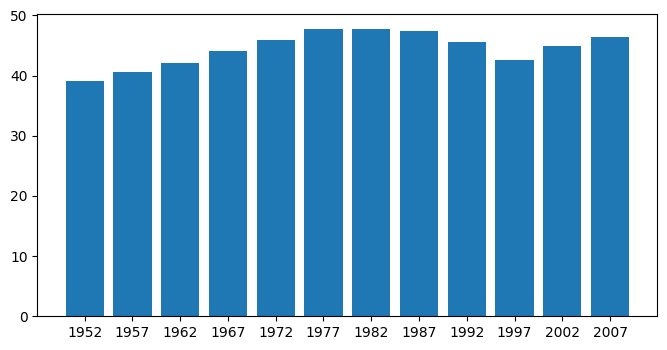

In [34]:
plt.figure(figsize=(8,4), dpi=100)
plt.bar(np.arange(len(df1['lifeExp'])), df1['lifeExp'])
plt.xticks(np.arange(len(df1['lifeExp'])),list(df1['year']))

In [35]:
##Extractions de espérance de vie par continent
df2=df.groupby(['year','continent'])['lifeExp'].mean()
df21=pd.DataFrame(df2).reset_index()
df21.head()

,year,continent,lifeExp
0,1952,Africa,39.135500
1,1952,Americas,53.279840
2,1952,Asia,46.861688
3,1952,Europe,64.725000
4,1952,Oceania,69.255000


## Visualisation avec Pie chat

Visualiser l'espérance de vie par continent en 2007.

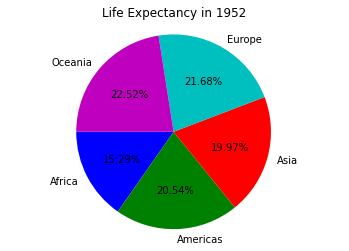

In [38]:
labels = df21[df21['year']==2007]['continent']
values= df21[df21['year']==2007]['lifeExp']
colors = ['b','g', 'r', 'c', 'm']
explode = np.zeros(len(df21[df21['year']==2007]))
plt.title('Life Expectancy in 1952')
plt.pie(values,labels=labels,colors=colors,explode=explode,
shadow=False,autopct='%1.2f%%',startangle=180)  #autopct to specify the percentage needed
plt.axis('equal')
plt.show()

A vous de jouer! Experimentez autant que vous voulez, en fonction des informations que vous voulez avoir.



Elaboré par: Berthine Nyunga
Prière de nous contacter au cas où vous avez des questions.

Email: bertheny2@gmail.com

Abonnez-vous à notre page Twitter: **@IndabaxDrc** et notre page Facebook: **@IndabaX DRC**

Partager votre experience avec IndabaX Drc2023 en nous identifiant sur Twitter **@IndabaxDrc** et sur facebook  **@IndabaX DRC**

Merci pour votre participation.